In [9]:
import pandas as pd
import json

# Load the data into a DataFrame
with open('grandmasterData.json') as f:
    gdData = f.read()
gdDict = json.loads(gdData)
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(dataDict["traits"])
            augments.append(dataDict["augments"])
            units.append(dataDict["units"])

df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

# Select data for the top 1 player
top1_data = df[df['placement'] == 1]

# Get the top 1 player's traits
top1_traits = top1_data['traits'].explode().value_counts().head(5)

# Get the top 1 player's augments
top1_augments = top1_data['augments'].explode().value_counts().head(5)

# Get the top 1 player's units
top1_units = top1_data['units'].explode().value_counts().head(5)

# Print the top 1 player's traits
print("Top 1 Player's Traits:")
print(top1_traits)

# Print the top 1 player's augments
print("\nTop 1 Player's Augments:")
print(top1_augments)

# Print the top 1 player's units
print("\nTop 1 Player's Units:")
print(top1_units)


Top 1 Player's Traits:
traits
Set10_Guardian     3776
Set10_Brawler      3696
Set10_Quickshot    3691
Set10_Fighter      3489
Set10_Jazz         3368
Name: count, dtype: int64

Top 1 Player's Augments:
augments
TFT10_Augment_InspiringEpitaph      421
TFT9_Augment_JeweledLotus           403
TFT10_Augment_Vampirism             394
TFT10_Augment_VampirismPlus         379
TFT9_Augment_GreaterJeweledLotus    328
Name: count, dtype: int64

Top 1 Player's Units:
units
TFT10_Lucian         3202
TFT10_Illaoi         2882
TFT10_MissFortune    2741
TFT10_Bard           2205
TFT10_Yorick         2198
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

def makeplot_top4(str, top4):
    cols = top4.filter(like=f'{str}')
    cols_sums = cols.sum()
    column_sums_sorted = cols_sums.sort_values(ascending=False)
    column_sums_filtered = column_sums_sorted.head(5)  # Reduced to top 5 items

    plt.figure(figsize=(8, 6))  # Adjusted figure size
    bars = plt.bar(range(len(column_sums_filtered)), column_sums_filtered)

    plt.xticks(range(len(column_sums_filtered)), column_sums_filtered.index, rotation=45, ha='right')

    plt.title(f'Count of Top 5 {str.capitalize()}s Used by Top 4 Winners in Grand Master Matches')
    plt.xlabel(f'{str.capitalize()}')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Load the data into a DataFrame
with open('grandmasterData.json') as f:
    gdData = f.read()
gdDict = json.loads(gdData)

# Extract data from the dictionary
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(','.join(dataDict["traits"]))  # Convert list to string
            augments.append(','.join(dataDict["augments"]))  # Convert list to string
            units.append(','.join(dataDict["units"]))  # Convert list to string

# Create a DataFrame
df = pd.DataFrame({
    "placement": placements,
    "traits": traits,
    "augments": augments,
    "units": units
})

# Select data for the top 4 players based on their placement
top4 = df[df['placement'] <= 4]  # Assuming top 4 players

# Plot top 5 units, augments, and traits for the top 4 players
makeplot_top4('units', top4)
makeplot_top4('augments', top4)
makeplot_top4('traits', top4)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
# Since linear regression is used, we can't calculate accuracy or use classification report.
# Instead, we can evaluate the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)



Mean Absolute Error (MAE): 9691096510.248236
Mean Squared Error (MSE): 8.54746401937134e+22
R-squared: -1.6251929281841466e+22


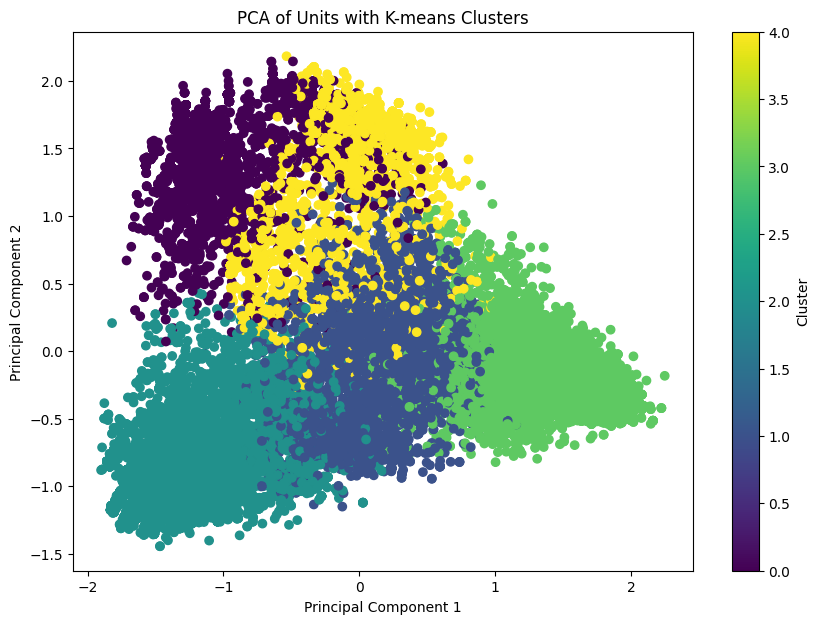

In [1]:
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

with open('grandmasterData.json') as f:
    gdDict = json.load(f)

placements = []
traits = []
augments = []
units = []

# 填充数据列表
for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(dataDict["traits"])
            augments.append(dataDict["augments"])
            units.append(dataDict["units"])

# 创建DataFrame
df = pd.DataFrame({
    "placement": placements,
    "traits": traits,
    "augments": augments,
    "units": units,
})

# 使用MultiLabelBinarizer转换traits, units, augments
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('traits')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("trait_"))
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('units')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("unit_"))
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('augments')),
                          columns=mlb.classes_,
                          index=df.index).add_prefix("augment_"))

# 仅选择包含'unit_'的列来进行聚类
unit_cols = df.filter(like='unit_')
# 使用PCA降维以可视化
pca = PCA(n_components=2)
unit_cols_reduced = pca.fit_transform(unit_cols)

# K-means聚类
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(unit_cols)

# 将聚类结果附加到降维后的数据上
df_reduced = pd.DataFrame(unit_cols_reduced, columns=['PC1', 'PC2'])
df_reduced['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 7))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c=df_reduced['cluster'], cmap='viridis')
plt.title('PCA of Units with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# 假设 df_units 是处理后包含所有'unit_'特征的DataFrame
# PCA 降维
pca = PCA(n_components=2)
df_units_reduced = pca.fit_transform(df_units)

# K-means 聚类
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_units_reduced)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(df_units_reduced[:, 0], df_units_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Team Compositions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 假设df是您已经准备好的DataFrame

# 将'placement'转化为二分类问题（1代表前四名，0代表其它）
df['placement_bin'] = (df['placement'] <= 4).astype(int)

# 特征和标签
X = df.drop(['placement', 'placement_bin'], axis=1)  # 假设您已经处理了特征
y = df['placement_bin']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 预测与评估
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


In [7]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 模拟数据
data = {
    "placement": [1, 2, 3, 4, 5, 6, 7, 8],
    "traits": [["Set3_Celestial", "Set3_Blademaster"], ["Set3_Rebel"], ["Set3_Sorcerer", "Set3_StarGuardian"], ["Set3_Cybernetic", "Set3_Infiltrator"], ["Set3_Void", "Set3_Brawler"], ["Set3_MechPilot", "Set3_Demolitionist"], ["Set3_SpacePirate", "Set3_Mystic"], ["Set3_Valkyrie", "Set3_Mercenary"]],
    "augments": [["Item1", "Item2"], ["Item2", "Item3"], ["Item3", "Item4"], ["Item1", "Item4"], ["Item2", "Item5"], ["Item3", "Item5"], ["Item1", "Item6"], ["Item2", "Item6"]],
    "units": [["Unit1", "Unit2", "Unit3"], ["Unit2", "Unit3", "Unit4"], ["Unit3", "Unit4", "Unit5"], ["Unit1", "Unit4", "Unit5"], ["Unit2", "Unit5", "Unit6"], ["Unit3", "Unit5", "Unit6"], ["Unit1", "Unit6", "Unit7"], ["Unit2", "Unit6", "Unit7"]]
}

df = pd.DataFrame(data)

mlb = MultiLabelBinarizer()
df_traits = pd.DataFrame(mlb.fit_transform(df['traits']), columns=mlb.classes_, index=df.index)
df_augments = pd.DataFrame(mlb.fit_transform(df['augments']), columns=mlb.classes_, index=df.index)
df_units = pd.DataFrame(mlb.fit_transform(df['units']), columns=mlb.classes_, index=df.index)

# 合并编码后的特征
df_encoded = pd.concat([df[['placement']], df_traits, df_augments, df_units], axis=1)



# 将'placement'转换为二分类问题，1代表前四名，0代表其他
df_encoded['placement_bin'] = (df_encoded['placement'] <= 4).astype(int)

# 特征和标签
X = df_encoded.drop(['placement', 'placement_bin'], axis=1)
y = df_encoded['placement_bin']

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 模型训练
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测与评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




Accuracy: 50.00%


In [9]:
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 之前您提供的加载数据代码
with open('grandmasterData.json') as f:
    gdData = f.read()
gdDict = json.loads(gdData)
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
    for i in range(len(gdDict[summonerID])):
        for puuid, dataDict in gdDict[summonerID][i].items():
            placements.append(dataDict["placement"])
            traits.append(dataDict["traits"])
            augments.append(dataDict["augments"])
            units.append(dataDict["units"])

df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

# 对traits, augments和units进行One-hot编码
mlb = MultiLabelBinarizer()
df_traits = pd.DataFrame(mlb.fit_transform(df['traits']), columns=mlb.classes_, index=df.index).add_prefix("trait_")
df_augments = pd.DataFrame(mlb.fit_transform(df['augments']), columns=mlb.classes_, index=df.index).add_prefix("augment_")
df_units = pd.DataFrame(mlb.fit_transform(df['units']), columns=mlb.classes_, index=df.index).add_prefix("unit_")

# 合并编码后的特征
df_encoded = pd.concat([df[['placement']], df_traits, df_augments, df_units], axis=1)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.50


In [11]:
# 将'placement'转化为是否第一名的二分类问题
df_encoded['is_first_place'] = (df_encoded['placement'] == 1).astype(int)

# 特征和标签
X = df_encoded.drop(['placement', 'is_first_place'], axis=1)
y = df_encoded['is_first_place']

# 训练集和测试集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练与评估
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.92


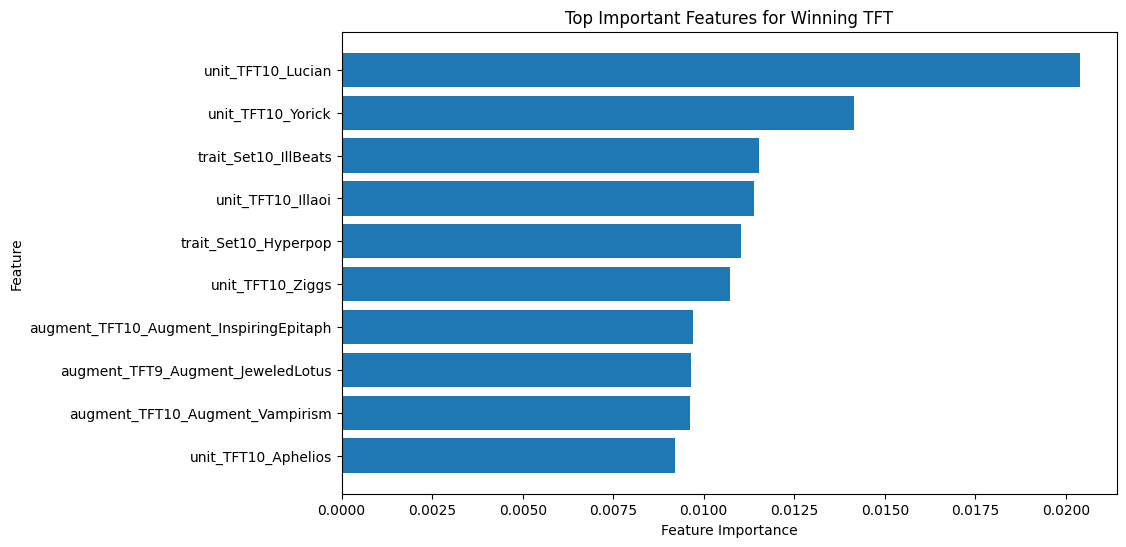

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 训练模型后获取特征重要性
feature_importances = clf.feature_importances_

# 将特征重要性与特征名称配对
features = X.columns
importances = list(zip(features, feature_importances))

# 对特征重要性进行排序
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

# 选择前N个最重要的特征进行可视化
top_n = 10
top_features = sorted_importances[:top_n]
labels, values = zip(*top_features)

# 可视化
plt.figure(figsize=(10, 6))
plt.barh(range(len(values)), values, tick_label=labels)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Important Features for Winning TFT')
plt.gca().invert_yaxis()  # 将最重要的特征放在顶部
plt.show()



In [11]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 示例数据（模拟您的真实数据结构）
data = {
    "placement": [1, 2, 3, 4, 5, 6, 7, 8],
    "traits": [["Set3_Celestial", "Set3_Blademaster"], ["Set3_Rebel"], ["Set3_Sorcerer", "Set3_StarGuardian"], ["Set3_Cybernetic", "Set3_Infiltrator"], ["Set3_Void", "Set3_Brawler"], ["Set3_MechPilot", "Set3_Demolitionist"], ["Set3_SpacePirate", "Set3_Mystic"], ["Set3_Valkyrie", "Set3_Mercenary"]],
    "augments": [["Item1", "Item2"], ["Item2", "Item3"], ["Item3", "Item4"], ["Item1", "Item4"], ["Item2", "Item5"], ["Item3", "Item5"], ["Item1", "Item6"], ["Item2", "Item6"]],
    "units": [["Unit1", "Unit2", "Unit3"], ["Unit2", "Unit3", "Unit4"], ["Unit3", "Unit4", "Unit5"], ["Unit1", "Unit4", "Unit5"], ["Unit2", "Unit5", "Unit6"], ["Unit3", "Unit5", "Unit6"], ["Unit1", "Unit6", "Unit7"], ["Unit2", "Unit6", "Unit7"]]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 使用MultiLabelBinarizer进行one-hot编码
mlb_traits = MultiLabelBinarizer()
traits_encoded = mlb_traits.fit_transform(df['traits'])
mlb_augments = MultiLabelBinarizer()
augments_encoded = mlb_augments.fit_transform(df['augments'])
mlb_units = MultiLabelBinarizer()
units_encoded = mlb_units.fit_transform(df['units'])

# 将编码后的数据转换回DataFrame，并添加前缀以区分不同的特征类型
traits_df = pd.DataFrame(traits_encoded, columns=mlb_traits.classes_).add_prefix('trait_')
augments_df = pd.DataFrame(augments_encoded, columns=mlb_augments.classes_).add_prefix('augment_')
units_df = pd.DataFrame(units_encoded, columns=mlb_units.classes_).add_prefix('unit_')

# 合并编码后的特征和原始的placement列
df_encoded = pd.concat([df[['placement']], traits_df, augments_df, units_df], axis=1)

# 定义特征X和目标变量y
X = df_encoded.drop(['placement'], axis=1)
y = (df_encoded['placement'] <= 4).astype(int)  # 定义前四名为1，其他为0

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 预测与评估
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.00%


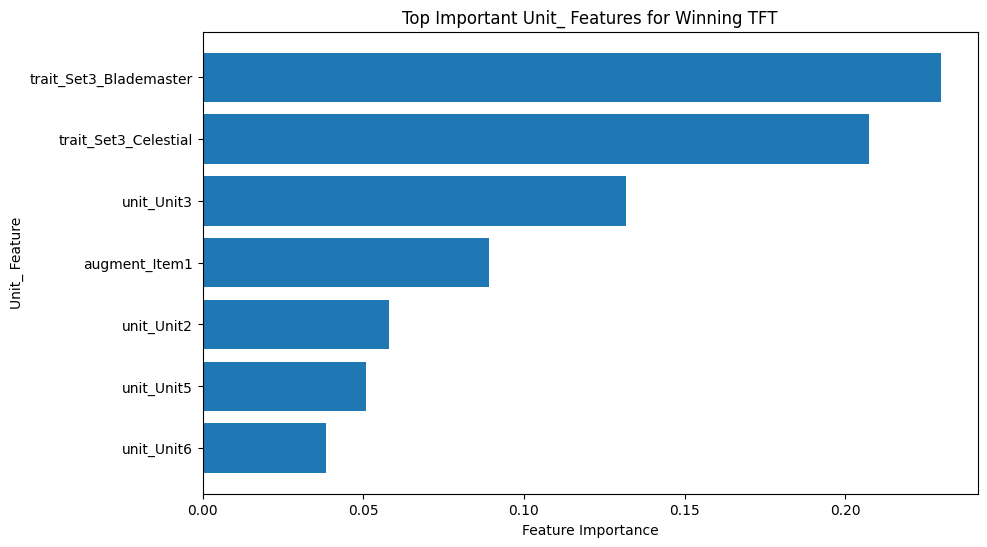

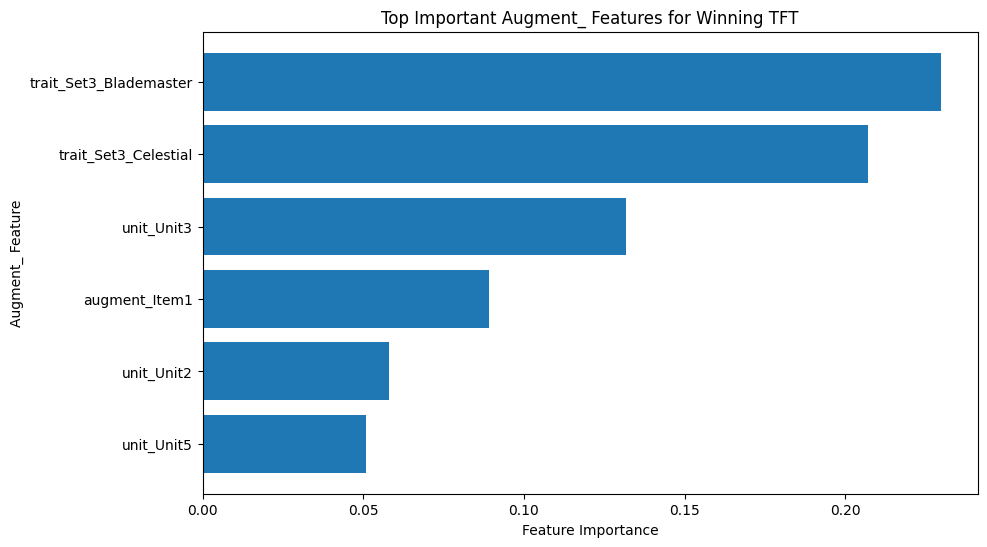

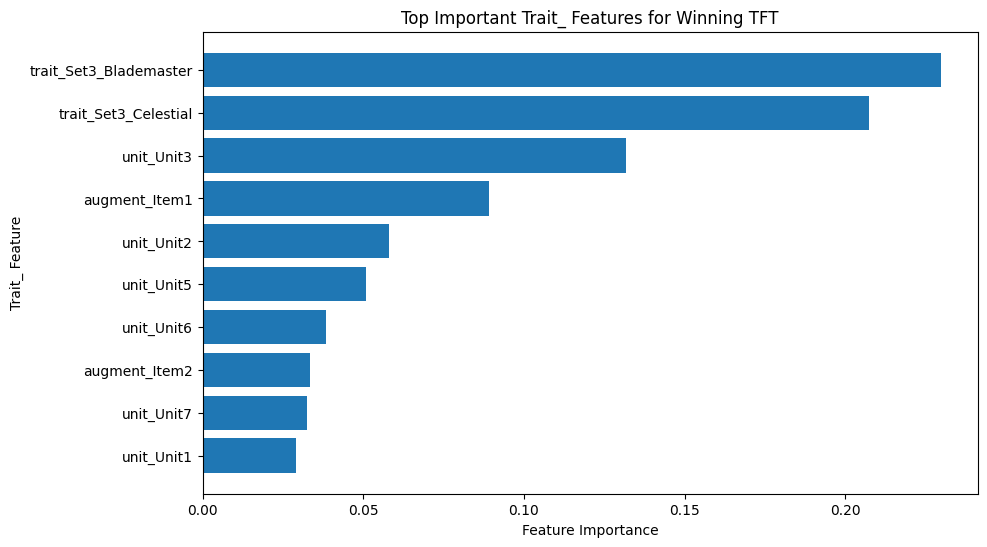

In [10]:
# 假设df_encoded已经准备好了，现在需要定义X和y

# 示例：假设我们关注的目标变量是是否第一名
df_encoded['is_first_place'] = (df_encoded['placement'] == 1).astype(int)

# 定义特征集X和目标变量y
X = df_encoded.drop(['placement', 'is_first_place'], axis=1)
y = df_encoded['is_first_place']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 特征重要性分析和可视化
feature_importances = clf.feature_importances_
features = X.columns
importances = list(zip(features, feature_importances))
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

# 分类特征重要性可视化
categories = ['unit_', 'augment_', 'trait_']
for category in categories:
    cat_features = [feature for feature in features if feature.startswith(category)]
    cat_importances = [importance for feature, importance in sorted_importances if feature.startswith(category)]
    
    # 选择前N个最重要的特征进行可视化
    top_n = min(10, len(cat_features))  # 防止特定类别特征不足10个
    labels, values = zip(*sorted_importances[:top_n])
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), values, tick_label=labels)
    plt.xlabel('Feature Importance')
    plt.ylabel(f'{category.capitalize()} Feature')
    plt.title(f'Top Important {category.capitalize()} Features for Winning TFT')
    plt.gca().invert_yaxis()
    plt.show()



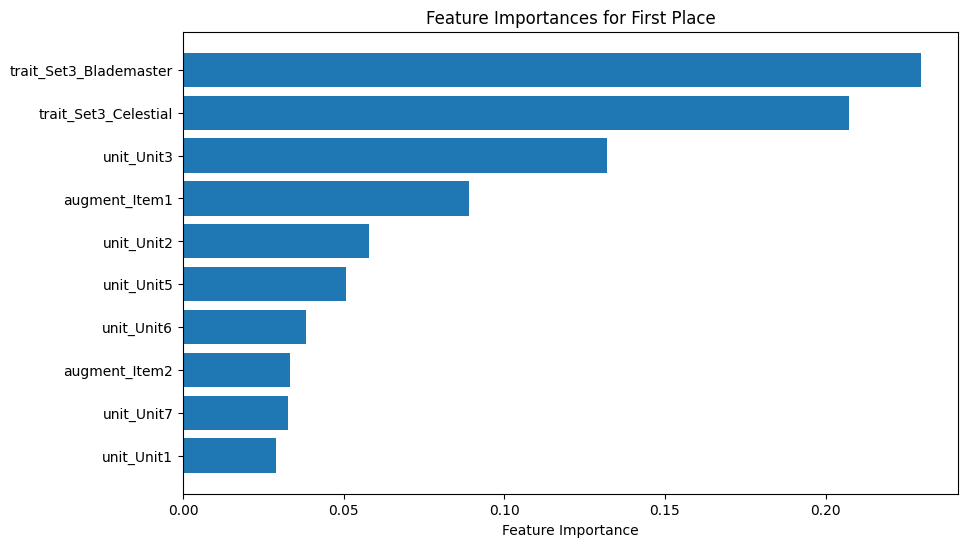

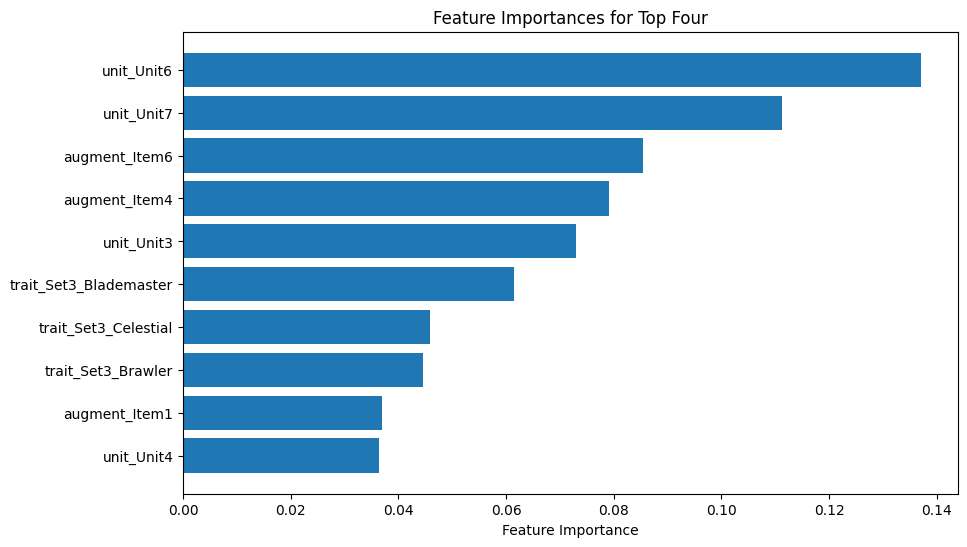

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 定义目标变量
df_encoded['is_first_place'] = (df_encoded['placement'] == 1).astype(int)
df_encoded['is_top_four'] = (df_encoded['placement'] <= 4).astype(int)

# 特征集
X = df_encoded.drop(['placement', 'is_first_place', 'is_top_four'], axis=1)

# 训练模型：预测第一名
y_first_place = df_encoded['is_first_place']
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X, y_first_place, test_size=0.2, random_state=42)
clf_first_place = RandomForestClassifier(n_estimators=100, random_state=42)
clf_first_place.fit(X_train_first, y_train_first)

# 训练模型：预测前四名
y_top_four = df_encoded['is_top_four']
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X, y_top_four, test_size=0.2, random_state=42)
clf_top_four = RandomForestClassifier(n_estimators=100, random_state=42)
clf_top_four.fit(X_train_top, y_train_top)

def visualize_feature_importances(clf, X_columns, title):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_indices = indices[:10]  # 选择最重要的前10个特征

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(10), importances[top_indices][::-1], align='center')
    plt.yticks(range(10), X_columns[top_indices][::-1])
    plt.xlabel('Feature Importance')
    plt.show()

# 对第一名胜利的模型的特征重要性进行可视化
visualize_feature_importances(clf_first_place, X.columns, "Feature Importances for First Place")
# 对前四名胜利的模型的特征重要性进行可视化
visualize_feature_importances(clf_top_four, X.columns, "Feature Importances for Top Four")




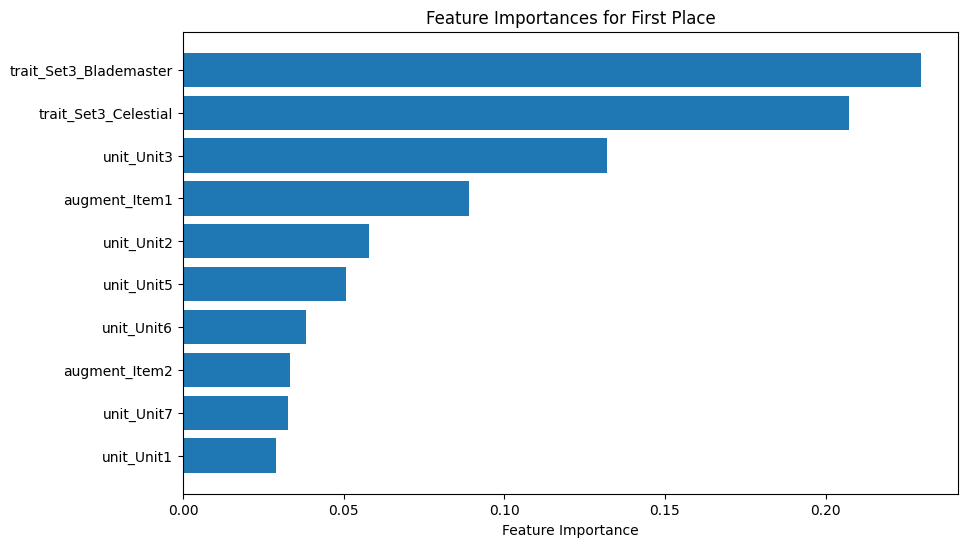

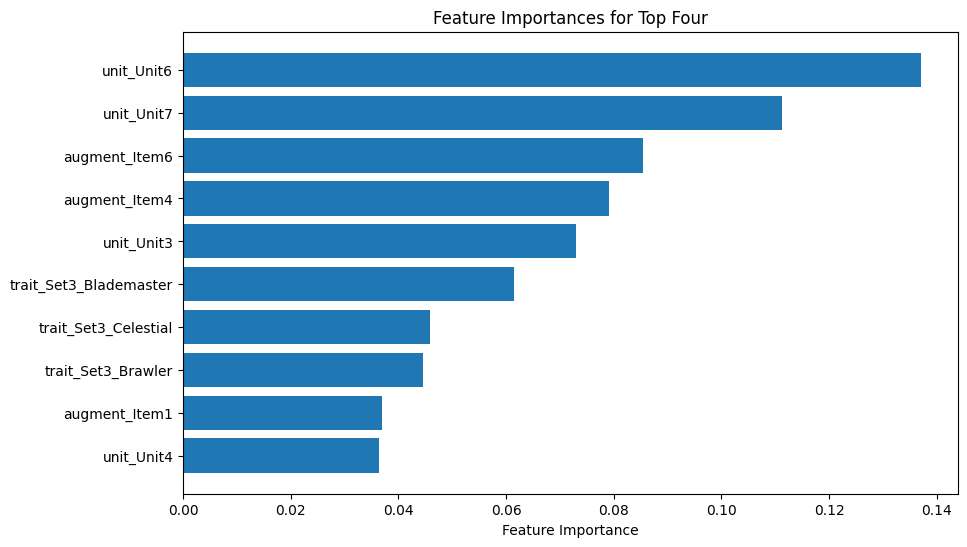

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 示例函数定义
def visualize_feature_importances(clf, X_columns, title):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_indices = indices[:10]  # 选择最重要的前10个特征

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(10), importances[top_indices][::-1], align='center')
    plt.yticks(range(10), X_columns[top_indices][::-1])
    plt.xlabel('Feature Importance')
    plt.show()

# 假设clf_first_place和clf_top_four是已训练的模型，X.columns包含了所有特征名
visualize_feature_importances(clf_first_place, X.columns, "Feature Importances for First Place")
visualize_feature_importances(clf_top_four, X.columns, "Feature Importances for Top Four")


In [17]:
# 假设 df 是已经正确加载并包含游戏内名称的 DataFrame

# 使用 MultiLabelBinarizer 进行 one-hot 编码，无需更改，只要确保输入数据是正确的
mlb = MultiLabelBinarizer()
units_encoded = mlb.fit_transform(df['units'])
traits_encoded = mlb.fit_transform(df['traits'])
augments_encoded = mlb.fit_transform(df['augments'])

# 示例：创建编码后的 DataFrame
units_df = pd.DataFrame(units_encoded, columns=mlb.classes_).add_prefix('unit_')
traits_df = pd.DataFrame(traits_encoded, columns=mlb.classes_).add_prefix('trait_')
augments_df = pd.DataFrame(augments_encoded, columns=mlb.classes_).add_prefix('augment_')

# 合并 DataFrame
df_encoded = pd.concat([df[['placement']], units_df, traits_df, augments_df], axis=1)

# 之后的模型训练和特征重要性可视化代码不变


ValueError: Shape of passed values is (8, 7), indices imply (8, 6)